In [4]:
import pandas as pd
import numpy as np

import os

In [5]:
os.getcwd()

'C:\\Users\\hanne\\dengue-predict\\src\\jupyter-notbooks'

In [6]:
cd C:\Users\hanne\dengue-predict

C:\Users\hanne\dengue-predict


In [7]:
train_labels = pd.read_csv('data/dengue_labels_train.csv')

In [8]:
train_labels.city.value_counts()

sj    936
iq    520
Name: city, dtype: int64

In [97]:
train = pd.read_csv('data/dengue_features_train.csv')

In [98]:
train = train.merge(train_labels, on=['city','year','weekofyear'], how='left')
train

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [11]:
train.groupby('city')['year'].value_counts()

city  year
iq    2001    52
      2002    52
      2003    52
      2004    52
      2005    52
      2006    52
      2007    52
      2008    52
      2009    52
      2000    26
      2010    26
sj    1991    52
      1992    52
      1993    52
      1994    52
      1995    52
      1996    52
      1997    52
      1998    52
      1999    52
      2000    52
      2001    52
      2002    52
      2003    52
      2004    52
      2005    52
      2006    52
      2007    52
      1990    35
      2008    17
Name: year, dtype: int64

In [12]:
test = pd.read_csv('data/dengue_features_test.csv')

In [13]:
test.groupby('city')['year'].value_counts()

city  year
iq    2011    52
      2012    52
      2010    26
      2013    26
sj    2009    52
      2010    52
      2011    52
      2012    52
      2008    35
      2013    17
Name: year, dtype: int64

<AxesSubplot:ylabel='Frequency'>

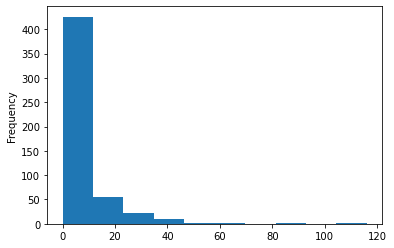

In [14]:
train_labels[train_labels.city=='iq'].total_cases.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

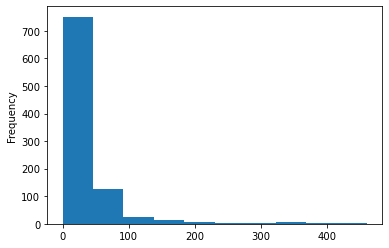

In [15]:
train_labels[train_labels.city=='sj'].total_cases.plot(kind='hist')

<AxesSubplot:>

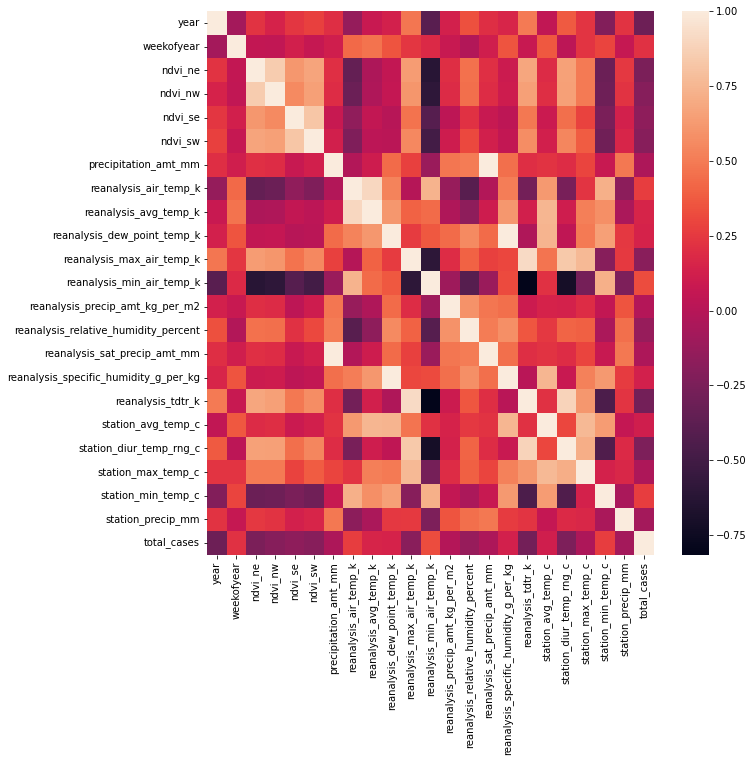

In [16]:
import seaborn as sns

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

sns.heatmap(train.corr(), ax=ax)

In [17]:
import itertools

In [18]:

for (c1, c2) in itertools.combinations(train.corr().columns, 2):
        if np.abs(train.corr().loc[c1,c2]) > 0.95 and c1 != c2:
            print(f"The absolute correlation coefficient between {c1} and {c2} is higher 0.9 [correlation coefficient = {train.corr().loc[c1,c2]}].")

The absolute correlation coefficient between precipitation_amt_mm and reanalysis_sat_precip_amt_mm is higher 0.9 [correlation coefficient = 1.0].
The absolute correlation coefficient between reanalysis_dew_point_temp_k and reanalysis_specific_humidity_g_per_kg is higher 0.9 [correlation coefficient = 0.9970512932011444].


In [19]:
np.abs(train[train.city=='iq'].corr()['total_cases']).sort_values(ascending=False)[1:]

reanalysis_specific_humidity_g_per_kg    0.236476
reanalysis_dew_point_temp_k              0.230401
reanalysis_min_air_temp_k                0.214514
station_min_temp_c                       0.211702
year                                     0.179451
reanalysis_tdtr_k                        0.134425
reanalysis_relative_humidity_percent     0.130083
station_avg_temp_c                       0.113070
reanalysis_precip_amt_kg_per_m2          0.101171
reanalysis_air_temp_k                    0.097098
reanalysis_sat_precip_amt_mm             0.090171
precipitation_amt_mm                     0.090171
reanalysis_avg_temp_k                    0.079872
station_max_temp_c                       0.075279
station_diur_temp_rng_c                  0.058230
reanalysis_max_air_temp_k                0.056474
station_precip_mm                        0.042976
ndvi_se                                  0.041067
ndvi_sw                                  0.032999
ndvi_ne                                  0.020215


In [20]:
np.abs(train[train.city=='sj'].corr()['total_cases']).sort_values(ascending=False)[1:]

weekofyear                               0.287134
year                                     0.212690
reanalysis_specific_humidity_g_per_kg    0.207947
reanalysis_dew_point_temp_k              0.203774
station_avg_temp_c                       0.196617
reanalysis_max_air_temp_k                0.194532
station_max_temp_c                       0.189901
reanalysis_min_air_temp_k                0.187943
reanalysis_air_temp_k                    0.181917
station_min_temp_c                       0.177012
reanalysis_avg_temp_k                    0.175267
reanalysis_relative_humidity_percent     0.144045
reanalysis_precip_amt_kg_per_m2          0.107457
ndvi_nw                                  0.075307
reanalysis_tdtr_k                        0.067600
reanalysis_sat_precip_amt_mm             0.060211
precipitation_amt_mm                     0.060211
station_precip_mm                        0.051759
ndvi_ne                                  0.037639
station_diur_temp_rng_c                  0.034630


In [21]:
#np.abs(train.corr()['total_cases']).sort_values(ascending=False)[1:]

In [99]:
train_sj = train[train.city=='sj']
train_iq = train[train.city=='iq']

In [133]:
X_sj = train_sj.drop(columns='total_cases')
y_sj = train_sj['total_cases']

In [134]:
y_sj

0      4
1      5
2      4
3      3
4      6
      ..
931    4
932    3
933    1
934    3
935    5
Name: total_cases, Length: 936, dtype: int64

In [145]:
X_sj

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,sj,2008,13,2008-03-25,0.077850,-0.039900,0.310471,0.296243,27.19,296.958571,...,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8
932,sj,2008,14,2008-04-01,-0.038000,-0.016833,0.119371,0.066386,3.82,298.081429,...,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5
933,sj,2008,15,2008-04-08,-0.155200,-0.052750,0.137757,0.141214,16.96,297.460000,...,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7
934,sj,2008,16,2008-04-15,0.001800,NaN,0.203900,0.209843,0.00,297.630000,...,4.82,72.285714,0.00,13.858571,2.785714,25.314286,6.242857,29.4,21.7,11.2


In [185]:
num_features = train.drop(columns=['total_cases','city','week_start_date','weekofyear']).columns

cat_features = ['weekofyear']

In [187]:
!pip install sklearn

from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from category_encoders.target_encoder import TargetEncoder
# Preprocessing for categorical data

# Bundle Preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('missing_imputation', IterativeImputer(random_state=42), num_features),
        ('encodings', OneHotEncoder(), cat_features)
    ])

estimator = lgb.LGBMRegressor(learning_rate=0.05,n_estimators=100,max_depth=5,num_leaves=10, random_state=42,
                         min_data_in_leaf=5)
pipe = Pipeline([('preprocessing', preprocessor),('estimator', estimator)]) 

preds = cross_val_predict(pipe, X_sj, y_sj)
    
mean_absolute_error(y_sj,preds)

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5


41.15850659719432

In [188]:
def pipeline(X: pd.DataFrame, y: pd.DataFrame, categorical_vars: list):
    
    X
    preprocessor = ColumnTransformer(
        transformers=[
            ('missing_imputation', SimpleImputer(strategy='mean'), X.drop(columns=['city','week_start_date','weekofyear']).columns),
            ('encodings', OneHotEncoder(), categorical_vars)
            ])

    estimator = RandomForestRegressor(random_state=42, n_estimators=100)

    pipe = Pipeline([('preprocessing', preprocessor),('estimator', estimator)]) 

    preds = cross_val_predict(pipe, X, y)
    
    mae = mean_absolute_error(y,preds)
    
    return mae

In [189]:
mae = pipeline(X_sj, y_sj, ['weekofyear'])

In [190]:
mae

38.347243589743584

In [23]:
import plotly as py
import plotly.graph_objs as go

In [26]:
# Constructing a figure
import numpy as np
x = train_sj.week_start_date

# Traces
total_cases = dict(
    type='scatter', 
    x=x, 
    y=train_sj.total_cases
)

humidity = dict(
    type='scatter', 
    x=x, 
    y=train_sj.reanalysis_specific_humidity_g_per_kg
)

# Figure
fig = go.Figure(data=[humidity]) 

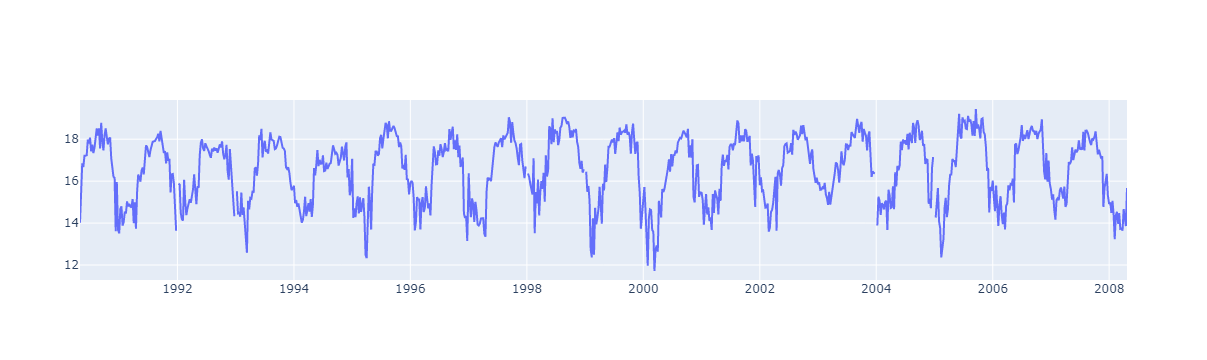

In [27]:
fig.show()

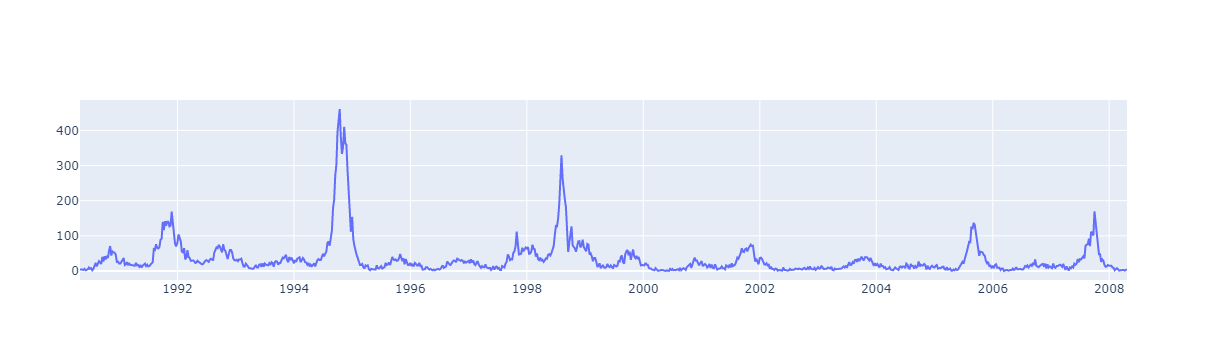

In [28]:
go.Figure(data=[total_cases]) 

In [36]:
from sklearn.model_selection import StratifiedKFold, KFold

In [31]:
Fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for n, (train_index, val_index) in enumerate(Fold.split(train, train.total_cases)):
    train.loc[val_index, 'fold'] = int(n)
train['fold'] = train['fold'].astype(int)
display(train.groupby('fold').size())

C:\Users\hanne\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



fold
0    292
1    291
2    291
3    291
4    291
dtype: int64

In [52]:
def create_folds(df, n_s=5, n_grp=None):
    df['Fold'] = -1
    
    if n_grp is None:
        skf = KFold(n_splits=n_s)
        target = df.total_cases
    else:
        skf = StratifiedKFold(n_splits=n_s)
        df['grp'] = pd.cut(df.total_cases, n_grp, labels=False)
        target = df.grp
    
    for fold_no, (t, v) in enumerate(skf.split(target, target)):
        df.loc[v, 'fold'] = fold_no
    return df

In [77]:
for c in ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'reanalysis_precip_amt_kg_per_m2']:
    new_df_sj = pd.DataFrame(train_sj['total_cases'])
    for i in range(14):
        new_df_sj[c+'_lag'+str(i)] = train_sj[c].shift(i)
    #print(new_df_sj.corr()
    # .total_cases
    # .drop('total_cases') # don't compare with myself
    # .sort_values(ascending=False)
    # .plot
    # .barh())
    print(np.abs(new_df_sj.corr()['total_cases']).sort_values(ascending=False)[1:].head(20))

reanalysis_specific_humidity_g_per_kg_lag8     0.301664
reanalysis_specific_humidity_g_per_kg_lag9     0.297949
reanalysis_specific_humidity_g_per_kg_lag7     0.297923
reanalysis_specific_humidity_g_per_kg_lag6     0.296603
reanalysis_specific_humidity_g_per_kg_lag5     0.290768
reanalysis_specific_humidity_g_per_kg_lag10    0.287928
reanalysis_specific_humidity_g_per_kg_lag4     0.280886
reanalysis_specific_humidity_g_per_kg_lag11    0.273402
reanalysis_specific_humidity_g_per_kg_lag3     0.268290
reanalysis_specific_humidity_g_per_kg_lag12    0.256814
reanalysis_specific_humidity_g_per_kg_lag2     0.250286
reanalysis_specific_humidity_g_per_kg_lag13    0.237109
reanalysis_specific_humidity_g_per_kg_lag1     0.229570
reanalysis_specific_humidity_g_per_kg_lag0     0.207947
Name: total_cases, dtype: float64
reanalysis_dew_point_temp_k_lag8     0.302021
reanalysis_dew_point_temp_k_lag9     0.299304
reanalysis_dew_point_temp_k_lag7     0.297398
reanalysis_dew_point_temp_k_lag6     0.29554

In [78]:
for c in ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'reanalysis_precip_amt_kg_per_m2']:
    new_df_iq = pd.DataFrame(train_iq['total_cases'])
    for i in range(14):
        new_df_iq[c+'_lag'+str(i)] = train_iq[c].shift(i)
    #print(new_df_sj.corr()
    # .total_cases
    # .drop('total_cases') # don't compare with myself
    # .sort_values(ascending=False)
    # .plot
    # .barh())
    print(np.abs(new_df_iq.corr()['total_cases']).sort_values(ascending=False)[1:].head(20))

reanalysis_specific_humidity_g_per_kg_lag0     0.236476
reanalysis_specific_humidity_g_per_kg_lag1     0.225996
reanalysis_specific_humidity_g_per_kg_lag2     0.221080
reanalysis_specific_humidity_g_per_kg_lag3     0.205429
reanalysis_specific_humidity_g_per_kg_lag5     0.182487
reanalysis_specific_humidity_g_per_kg_lag4     0.165396
reanalysis_specific_humidity_g_per_kg_lag6     0.153936
reanalysis_specific_humidity_g_per_kg_lag7     0.141907
reanalysis_specific_humidity_g_per_kg_lag8     0.125387
reanalysis_specific_humidity_g_per_kg_lag9     0.108372
reanalysis_specific_humidity_g_per_kg_lag10    0.079537
reanalysis_specific_humidity_g_per_kg_lag11    0.061205
reanalysis_specific_humidity_g_per_kg_lag12    0.051601
reanalysis_specific_humidity_g_per_kg_lag13    0.009775
Name: total_cases, dtype: float64
reanalysis_dew_point_temp_k_lag0     0.230401
reanalysis_dew_point_temp_k_lag1     0.220891
reanalysis_dew_point_temp_k_lag2     0.215446
reanalysis_dew_point_temp_k_lag3     0.19957

In [80]:
train_sj['reanalysis_precip_amt_kg_per_m2'].rolling(1)

Rolling [window=1,center=False,axis=0,method=single]

In [82]:
for c in ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'reanalysis_precip_amt_kg_per_m2']:
    new_df_sj = pd.DataFrame(train_sj['total_cases'])
    for i in range(20):
        new_df_sj[c+'_rolling'+str(i)] = train_sj[c].rolling(i).mean()
    #print(new_df_sj.corr()
    # .total_cases
    # .drop('total_cases') # don't compare with myself
    # .sort_values(ascending=False)
    # .plot
    # .barh())
    print(np.abs(new_df_sj.corr()['total_cases']).sort_values(ascending=False)[1:].head(20))

reanalysis_specific_humidity_g_per_kg_rolling14    0.328433
reanalysis_specific_humidity_g_per_kg_rolling15    0.328013
reanalysis_specific_humidity_g_per_kg_rolling13    0.327227
reanalysis_specific_humidity_g_per_kg_rolling16    0.326301
reanalysis_specific_humidity_g_per_kg_rolling12    0.324831
reanalysis_specific_humidity_g_per_kg_rolling17    0.323629
reanalysis_specific_humidity_g_per_kg_rolling11    0.321267
reanalysis_specific_humidity_g_per_kg_rolling18    0.320197
reanalysis_specific_humidity_g_per_kg_rolling10    0.316055
reanalysis_specific_humidity_g_per_kg_rolling19    0.315657
reanalysis_specific_humidity_g_per_kg_rolling9     0.308592
reanalysis_specific_humidity_g_per_kg_rolling8     0.300692
reanalysis_specific_humidity_g_per_kg_rolling7     0.292602
reanalysis_specific_humidity_g_per_kg_rolling6     0.282466
reanalysis_specific_humidity_g_per_kg_rolling5     0.270922
reanalysis_specific_humidity_g_per_kg_rolling4     0.258312
reanalysis_specific_humidity_g_per_kg_ro

In [83]:
for c in ['reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'reanalysis_precip_amt_kg_per_m2']:
    new_df_iq = pd.DataFrame(train_iq['total_cases'])
    for i in range(20):
        new_df_iq[c+'_rolling'+str(i)] = train_iq[c].rolling(i).mean()
    #print(new_df_sj.corr()
    # .total_cases
    # .drop('total_cases') # don't compare with myself
    # .sort_values(ascending=False)
    # .plot
    # .barh())
    print(np.abs(new_df_sj.corr()['total_cases']).sort_values(ascending=False)[1:].head(20))

reanalysis_precip_amt_kg_per_m2_rolling9     0.216801
reanalysis_precip_amt_kg_per_m2_rolling8     0.216752
reanalysis_precip_amt_kg_per_m2_rolling10    0.216394
reanalysis_precip_amt_kg_per_m2_rolling7     0.215888
reanalysis_precip_amt_kg_per_m2_rolling11    0.214142
reanalysis_precip_amt_kg_per_m2_rolling6     0.210499
reanalysis_precip_amt_kg_per_m2_rolling12    0.209851
reanalysis_precip_amt_kg_per_m2_rolling5     0.203342
reanalysis_precip_amt_kg_per_m2_rolling13    0.203322
reanalysis_precip_amt_kg_per_m2_rolling14    0.198059
reanalysis_precip_amt_kg_per_m2_rolling15    0.193510
reanalysis_precip_amt_kg_per_m2_rolling4     0.191198
reanalysis_precip_amt_kg_per_m2_rolling16    0.187881
reanalysis_precip_amt_kg_per_m2_rolling17    0.180142
reanalysis_precip_amt_kg_per_m2_rolling18    0.172348
reanalysis_precip_amt_kg_per_m2_rolling3     0.172078
reanalysis_precip_amt_kg_per_m2_rolling19    0.163818
reanalysis_precip_amt_kg_per_m2_rolling2     0.143557
reanalysis_precip_amt_kg_per